In [1]:
import pandas as pd

In [10]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [11]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600


In [12]:
confirmed['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [13]:
confirmed['Province/State'].unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories',
       'Nova Scotia', 'Nunavut', 'Ontario', 'Prince Edward Island',
       'Quebec', 'Repatriated Travellers', 'Saskatchewan', 'Yukon',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Unknown', 'Xinjiang', 'Yunnan', 'Zhejiang',
       'Faroe Islands', 'Greenland', 'French Guiana', 'French Polynesia',
       'Guadeloupe', 'Martiniq

In [14]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                   33.9391
Long                    67.71
1/22/20                     0
                     ...     
6/8/21                  82326
6/9/21                  84050
6/10/21                 85892
6/11/21                 87716
6/12/21                 88740
Name: 0, Length: 512, dtype: object

In [85]:
# armazenando a data mais atual (última)
last_date = '6/12/21'

In [16]:
confirmed['Country/Region'].value_counts()

China                 34
Canada                16
United Kingdom        12
France                12
Australia              8
                      ..
Guatemala              1
Papua New Guinea       1
West Bank and Gaza     1
Slovakia               1
Iraq                   1
Name: Country/Region, Length: 193, dtype: int64

In [22]:
# valor falso pois o erro é muito grande
# descartaremos esta análise pois tem muito campo vazio (muita disparidade no padrão)
confirmed['Country/Region'].value_counts()

China                 34
Canada                16
United Kingdom        12
France                12
Australia              8
                      ..
Guatemala              1
Papua New Guinea       1
West Bank and Gaza     1
Slovakia               1
Iraq                   1
Name: Country/Region, Length: 193, dtype: int64

In [28]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600


In [33]:
confirmed_by_country.loc["China"][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
6/8/21     103235.0
6/9/21     103261.0
6/10/21    103285.0
6/11/21    103320.0
6/12/21    103357.0
Name: China, Length: 508, dtype: float64

In [46]:
import matplotlib.pyplot as plt

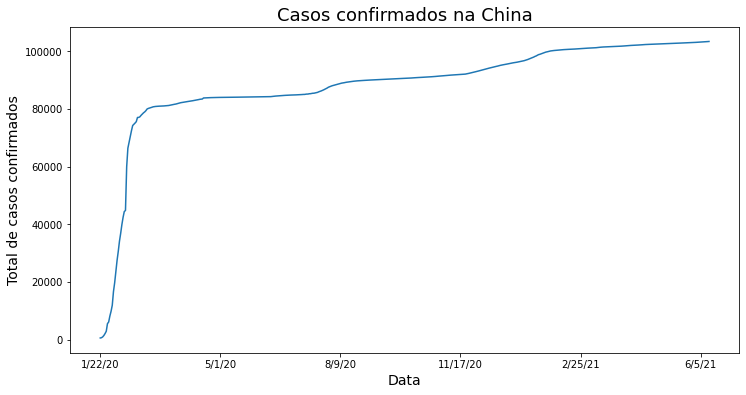

In [82]:
# casos confirmados cumulativos na China
# compara o momento inicial ao momento atual

plt.figure(figsize = (12, 6))
confirmed_by_country.loc["China"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Total de casos confirmados', fontsize = 14)
plt.title('Casos confirmados na China', fontsize = 18)
plt.show()

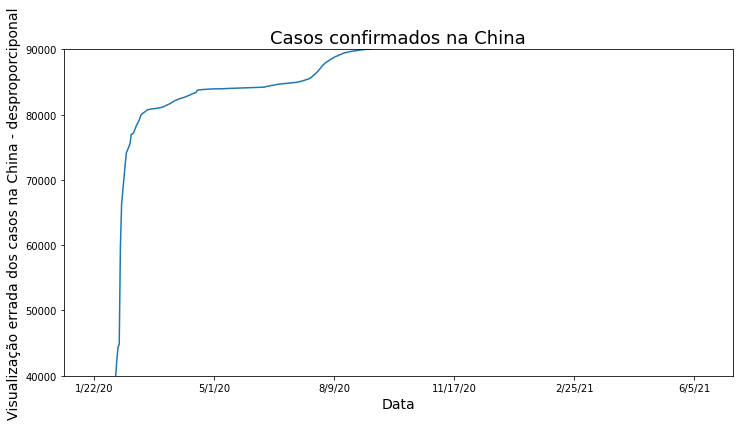

In [81]:
# limitando o eixo y
# mensagem ruim a quem está visualizando o gráfico

plt.figure(figsize = (12, 6))
confirmed_by_country.loc["China"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Visualização errada dos casos na China - desproporciponal', fontsize = 14)
plt.ylim(40000, 90000)
plt.title('Casos confirmados na China', fontsize = 18)
plt.show()

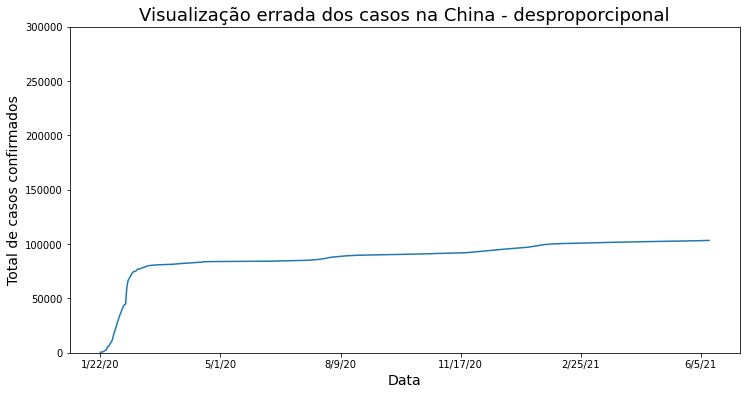

In [80]:
# mensagem ruim a quem está visualizando o gráfico
# compara o momento inicial com 300 mil

plt.figure(figsize = (12, 6))
confirmed_by_country.loc["China"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Total de casos confirmados', fontsize = 14)
plt.ylim(0, 300000)
plt.title('Visualização errada dos casos na China - desproporciponal', fontsize = 18)
plt.show()

In [75]:
# casos confirmados por dia na China
new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()

In [78]:
new_cases_china.describe()

count      507.000000
mean       202.779093
std        892.519746
min         -1.000000
25%         19.000000
50%         31.000000
75%         88.500000
max      15136.000000
Name: China, dtype: float64

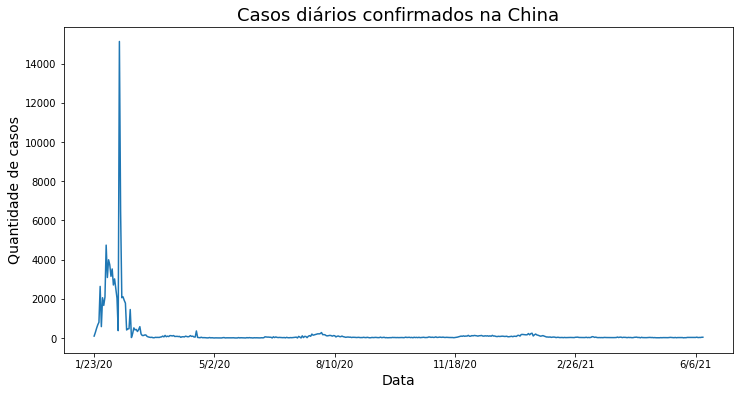

In [95]:
# gráfico dos casos diários na China
plt.figure(figsize = (12, 6))
new_cases_china.plot()

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos diários confirmados na China', fontsize = 18)
plt.show()

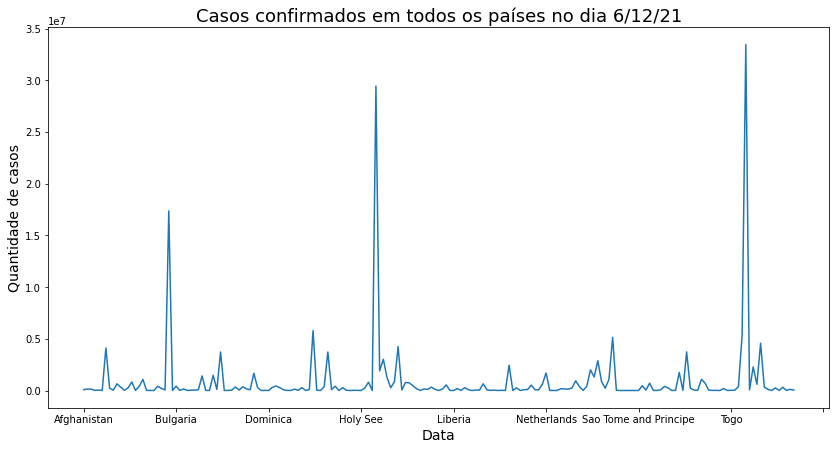

In [90]:
# últimos casos confirmados em cada país
plt.figure(figsize = (14, 7))
confirmed_by_country[last_date].plot()

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

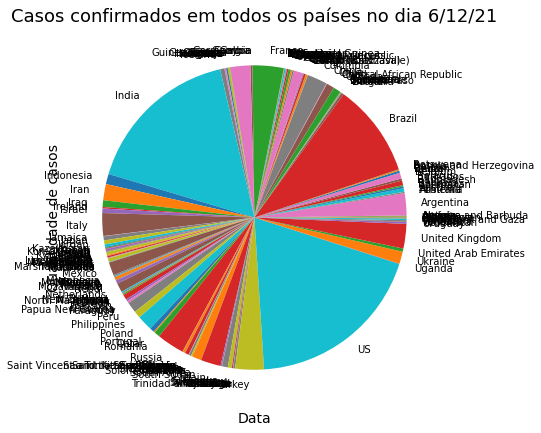

In [96]:
# QUASE SEMPRE DEVEMOS EVITAR GRÁFICO DE PIZZA
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].plot(kind = 'pie')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

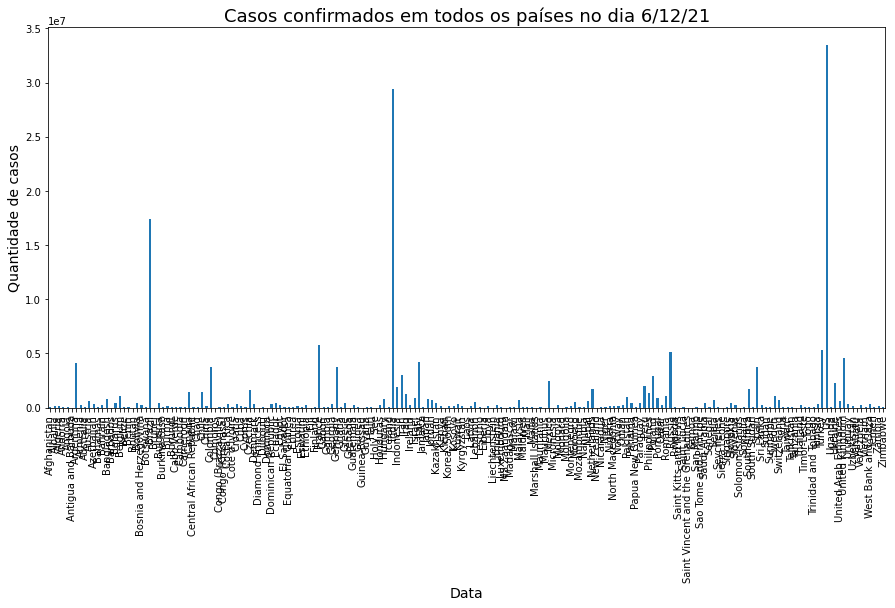

In [97]:
#gráfico de barra
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].plot(kind = 'bar')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

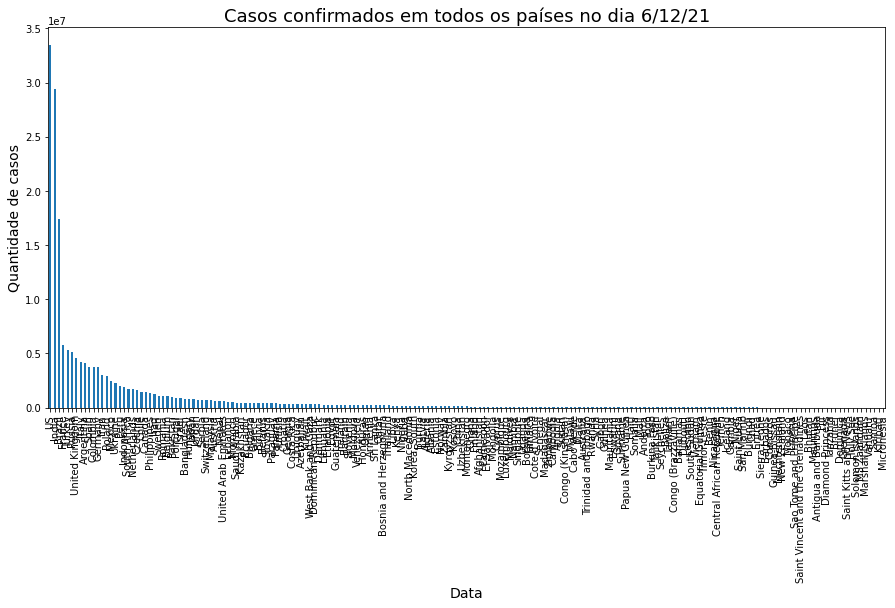

In [99]:
# ordenando os valores
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].sort_values(ascending = False).plot(kind = 'bar')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Casos confirmados em todos os países no dia {}'.format(last_date), fontsize = 18)
plt.show()

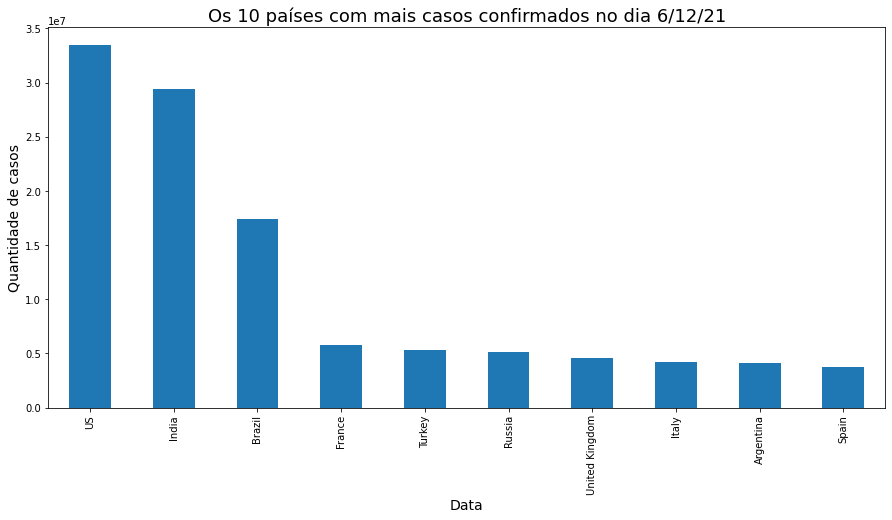

In [101]:
# ordenando os valores
# últimos casos confirmados em cada país
plt.figure(figsize = (15, 7))
confirmed_by_country[last_date].sort_values(ascending = False)[0:10].plot(kind = 'bar')

plt.xlabel('Data', fontsize = 14)
plt.ylabel('Quantidade de casos', fontsize = 14)
plt.title('Os 10 países com mais casos confirmados no dia {}'.format(last_date), fontsize = 18)
plt.show()

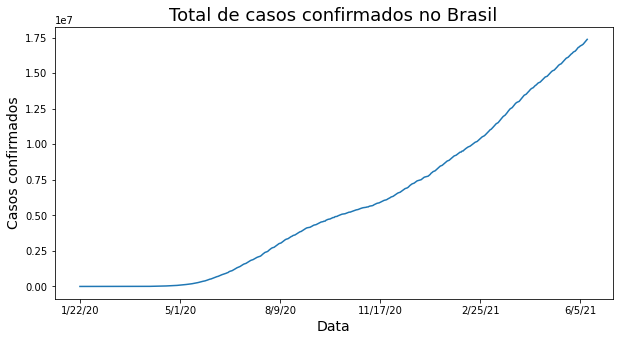

In [84]:
# casos confirmados cumulativos na Brasil
plt.figure(figsize = (10, 5))
confirmed_by_country.loc["Brazil"][2:].plot()
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Casos confirmados', fontsize = 14)
plt.title('Total de casos confirmados no Brasil', fontsize = 18)
plt.show()

In [39]:
# mortos e recuperados no
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [49]:
deaths_by_country = deaths.groupby('Country/Region').sum()
recovered_by_country = recovered.groupby('Country/Region').sum()

In [41]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/21,6/1/21,6/2/21,6/3/21,6/4/21,6/5/21,6/6/21,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53694,53750,53961,54019,54040,54222,54382,54503,54534,54619,54634,54663,54686,55010,55118,55529,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281,57450,57629,57741,57963,58070,58144,58265,58622,58998,59569,59871,60280,60598,60939
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,112626,113468,114362,115253,116126,117089,118041,119061,120072,121122,122105,123081,124312,125419,126405,127240,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215,129308,129431,129473,129521,129566,129598,129627,129664,129702,129736,129761,129785,129807,129826
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,85693,85869,86007,86149,86280,86420,86554,86703,86857,87003,87137,87251,87359,87476,87609,87746,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419,89625,89839,90057,90281,90517,90767,90995,91198,91413,91651,91894,92132,92384,92620
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12818,12884,12900,12936,12962,12995,13021,13070,13104,13104,13155,13155,13155,13211,13234,13234,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416,13416,13458,13479,13507,13527,13527,13527,13527,13557,13557,13569,13578,13591,13591
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24190,24492,24503,24698,24713,24717,24772,25145,25187,25629,25650,25703,25715,25995,26013,26458,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646,27766,28079,28190,28264,28646,28802,28866,28880,29329,29368,29553,29960,30101,30207


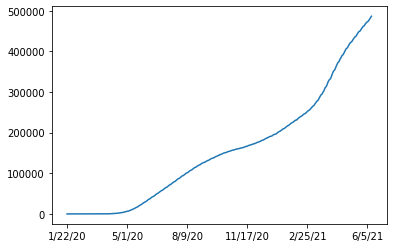

In [48]:
deaths_by_country.loc['Brazil'][2:].plot()